In [1]:
from sklearn.datasets import make_classification
import numpy as np 

In [2]:

X, y  = make_classification(
    n_samples=100,
    n_features=2,
    
    # the sum of these three must be less than or equal to (n_features)
    n_informative=1,
    n_redundant=0,
    # n_repeated=0,
    
    # the multiplication of these two must be less than or equal to (2^n_informative)
    n_classes=2,
    n_clusters_per_class=1,
    
    hypercube= False,
    class_sep=10,
    
    random_state=41
    )


In [3]:
print(f"X: {X}")
print()
print(f"y: {y}")


X: [[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]
 [-0.83241122  0.15599044]
 [-1.79207014  1.07782053]
 [ 0.0856607   0.80626713]
 [-0.55865299  0.74859527]
 [-1.95974262  0.75152794]
 [-1.77828947 -0.90114581]
 [-1.77985853 -0.1815243 ]
 [-0.02194151 -2.98092432]
 [ 0.80563431  1.20500136]
 [-1.82701214  0.78302407]
 [ 0.38730728  0.42968688]
 [-0.14108668 -0.73229726]
 [-1.87955941 -0.83930476]
 [-0.18232911  0.83727062]
 [-1.77059533 -0.10255323]
 [-2.27658028  0.65867001]
 [-2.06519502  0.92649819]
 [-1.31690551  0.10216193]
 [ 1.61043259  0.46886454]
 [-1.21650394  0.45432938]
 [ 0.6139723   1.8613386 ]
 [-1.78760957 -0.79255991]
 [-1.04149161 -1.0004391 ]
 [-2.40067584 -0.53814137]
 [-1.80383452  0.44027716]
 [-1.44075613  0.27047889]
 [ 1.34989978 -0.75869267]
 [ 0.22520167  0.6802322 ]
 [ 0.53688527  0.17018845]
 [ 0.55483459 -1.01121977]
 [-0.32178185 -0.8394709 ]
 [-0.98821248  0.90327412

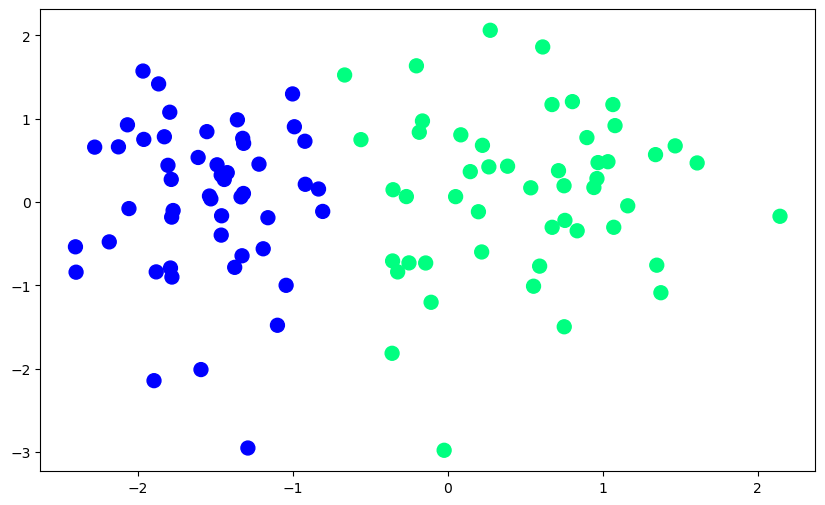

In [4]:
import matplotlib.pyplot as plt 

# here s = size, c(colortype=based on the output) , cmap(colormap)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100);



In [5]:
# create a step function that will convert is my result is greter than 0 then give me 1 otherwize 0 

def step(z):
    return 1 if z>0 else 0

In [6]:
'''
# Now we implement the algorithm of perceptron trick:

def perceptron(X,y):
    # as in our algorithrm of perceptron trick you will add 1 before all the row
    X = np.insert(X,0,1,axis=1)
    print(f"{X.shape}")
    weights = np.ones(shape=X.shape[1])
    
    lr = 0.1
    
    for i in range(1000):
        # select a random number between 1 t0 100 beacuse X.shpae() -> 100,2
        j = np.random.randint(0,100)
        
        # in my algorithm, we see how we use dot product to calcuate randomly selected student  
        # placement value + or - 
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*((y[j]-y_hat)*X[j])
        
        # weights[0],weights[1:]
        # intercept, coefficient
        return weights[0],weights[1:]
'''

# Perceptron algorithm
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(shape=X.shape[1])
    lr = 0.1
    for _ in range(1000):
        for i in range(len(X)):
            y_hat = step(np.dot(X[i], weights))
            weights = weights + lr * ((y[i] - y_hat) * X[i])
    return weights[0], weights[1:]

In [7]:
intercept,coefficient = perceptron(X,y)

print(f"intercept: {intercept}")
print(f"coefficient: {coefficient}")

intercept: 0.9
coefficient: [1.3878435  0.10597147]


In [8]:
# we get the value as c+ax+by = 0. now determine the value of m and y = mx + c 

m = (-coefficient[0])/(coefficient[1])

b = (-intercept)/coefficient[1]

print(f"the value of m : {m} \n the value of b : {b}")

the value of m : -13.096388513261017 
 the value of b : -8.492852183439245


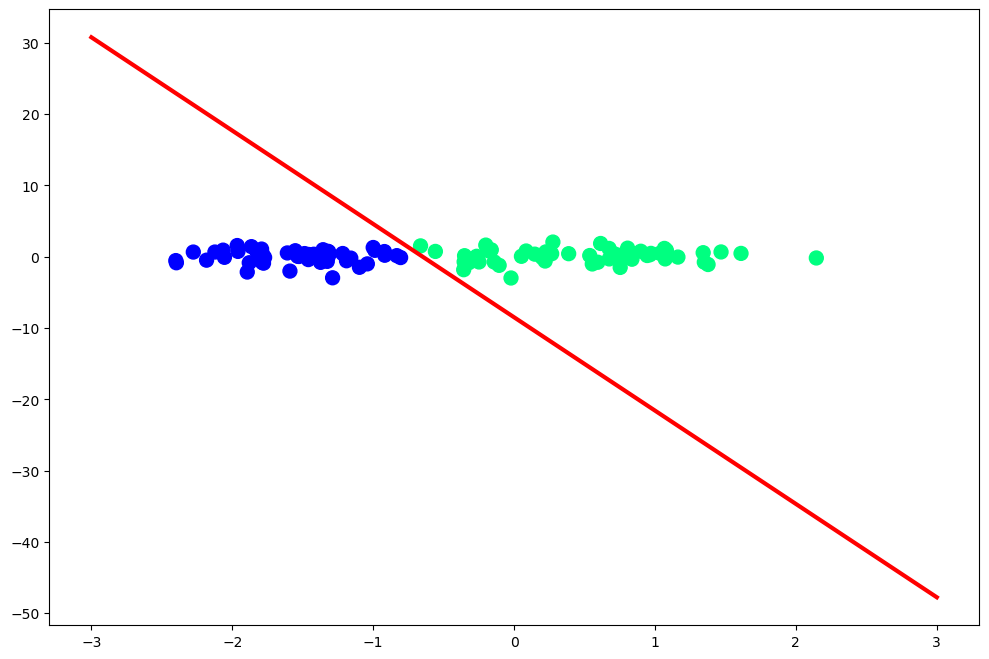

In [9]:
# generate 100 random value from -3 to 3 
X_input = np.linspace(-3,3,100)
y_input = m*X_input + b


plt.figure(figsize=(12,8))

plt.plot(X_input,y_input,color="red",linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
